# <font color='orange'>**Personality Prediction from Social media posts with Machine Learning and Deep Neural Networks**</font>

<font color='pink'>**Abstract-**</font>
The Myers Briggs Type Indicator is a personality type system that divides a person into 16 distinct
personalities based on introversion, intuition, thinking and perceiving capabilities. You need to
identify the personality of a person from the type of posts they put on social media.
In this project we have figure out the personality of a person from their social media posts — either (Extraversion (E) vs. Introversion (I), Sensing (S) vs. Intuition (N), Thinking (T) vs. Feeling (F), udging (J) vs. Perceiving (P) )— they fall under.I focus particularly on feature of text data and provide an in-depth look at the logic, concepts, and properties of the deep neural networks (DNNs) today. I also provide an introduction to a few key machine learning models and the logic in choosing their hyperparameters.

# <font color='skyblue'>**Importing Necessary Libraries**</font>

In [508]:
import re
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from nltk.stem.porter import PorterStemmer 
from nltk.tokenize import word_tokenize
stemmer=PorterStemmer()
import string
from nltk.corpus import stopwords

In [509]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [510]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

<font color="Pink">Please mount your own drive before making any changes

In [511]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color='skyblue'>**Table of Contents**</font>
1.   Intro: Personality Prediction on MBTI dataset
2.   Feature Extraction
    *   Preprocessing (Cleaning Text)
    *   Visulization
3.   Classical Machine Learning Models with Accuracy
    *   Training: The 70/30 Split and Validation
    *   Logistic Regression
    *   Random Forests Classifier
    *   K Neighbor
4.   Word Cloud and most used words
    *   Bar plot and Wordcloud for all 16 classes
5.   Training and Evaluating the Deep Neural network(DNN) Model 
    *   CNN Model
        *   Confusion Matrix
        *   The loss function plot

<font color="orange">Importing CSV File

In [512]:
df = pd.read_csv("/content/drive/MyDrive/ml_folder/mbti_1.csv")
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [514]:
#df["type"] = df["type"].astype('category')
#df["type"] = df["type"].cat.codes

In [515]:
df["type"].nunique()

16

In [516]:
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [517]:
x = df.drop('type', axis=1)
y = df['type']

In [518]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [519]:
print(len(df))

8675


In [520]:
len(df['posts'][0])

4652

# <font color="orange"> Text Cleaning and Visulization of dataset

<font color="Pink">Added column num_post which tell us total number post of a person

In [521]:
#total posts per user
df['num_posts'] = df['posts'].map(lambda p: len(p.split('|||')))

In [522]:
df[(df['num_posts'] != 50)]

,type,posts,num_posts
11,ENFJ,'https://www.youtube.com/watch?v=PLAaiKvHvZs||...,43
16,INFJ,'some of these both excite and calm me: BUTTS...,49
23,INFP,'45016 urh sorry uh. couldn't resist.|||all of...,28
28,INFP,"'Basically, my main questions are : What do yo...",48
54,INFP,"'I love reading, and I wish I wasn't allergic ...",42
...,...,...,...
8612,ENTJ,You tell him! Christ. I do wanna thank everyo...,19
8617,ENFP,'Thank you! I look forward to connecting with ...,74
8629,INTP,"'A chimichanga.|||Hello, dear fellow café-memb...",37
8640,INTP,'This is a great thread... I find it interesti...,35


<font color="Pink">Visulizing Plot for value counts of each personality type

In [523]:
import matplotlib.pyplot as plt

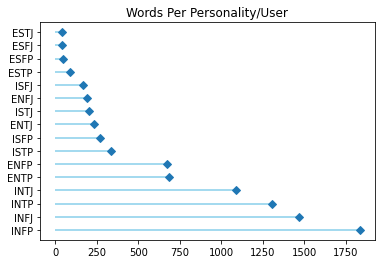

In [524]:
plt.hlines(y=list(range(16)), xmin=0, xmax=df["type"].value_counts(), color='skyblue')
plt.plot(df["type"].value_counts(), list(range(16)), "D")
plt.title("Words Per Personality/User")
plt.yticks(list(range(16)), df["type"].value_counts().index)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



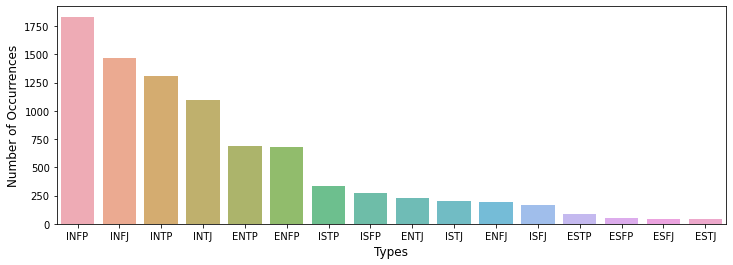

In [525]:
cnt_types = df['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

Unique values in type

In [526]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

<font color="Pink">Post for all classes

In [527]:
all_posts= pd.DataFrame()
for j in types:
    temp1 = df[df['type']==j]['posts']
    temp2 = []
    for i in temp1:
        temp2+=i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

In [528]:
all_posts.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


In [529]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<font color="Pink">To clean the posts (Removing https, multiline etc)

In [530]:
def cleanText(text):
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', '', text)
    text = text.replace("|||"," ")
    text=text.lower()
    text = re.sub(r"http\S+", "", text, flags=re.MULTILINE)

    return text

In [531]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<font color="Violet">Cleaning of Posts

In [532]:
df['posts'] = df['posts'].apply(cleanText)
df.head()

,type,posts,num_posts
0,INFJ,' enfp and intj moments sportscenter not t...,50
1,ENTP,'i'm finding the lack of me in these posts ver...,50
2,INTP,"'good one _____ of course, to which i say ...",50
3,INTJ,"'dear intp, i enjoyed our conversation the o...",50
4,ENTJ,'you're fired. that's another silly misconcept...,50


In [533]:
def print_post(index):
    example = df[df.index == index][['posts', 'type']].values[0]
    if len(example) > 0:
        print('type: ', example[1])
        print('length of post: ', len(example[0]))
        print('post: ', example[0])

In [534]:
print_post(0)

type:  INFJ
length of post:  3326
post:  '  enfp and intj moments    sportscenter not top ten plays    pranks what has been the most life-changing experience in your life?      on repeat for most of today. may the perc experience immerse you. the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~    hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as... 84389  84390     ... welcome and stuff.   game. set. match. prozac, wellbrutin, at least thirty minutes of moving your legs (and i don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative... basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, 

<font color="Violet">Plotted the number of Posts for all personality 

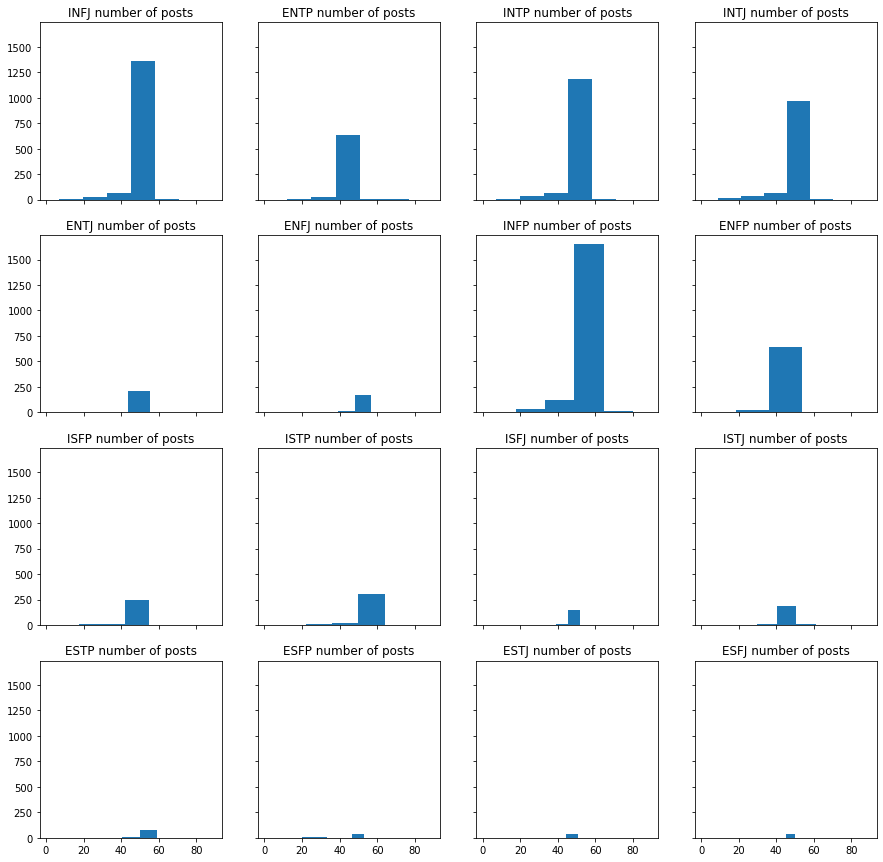

In [535]:
fig, ax = plt.subplots(nrows = int(len(df['type'].unique())/4), ncols=4, sharex=True, sharey=True, figsize=(15,15))
k = 0
ax = ax.ravel()
for i in df['type'].unique():
    df_1 = df[(df['type'] == i)]['num_posts']
    ax[k].hist(df_1, bins=5)
    ax[k].set_title(i + " number of posts", fontsize = 12)
    k += 1

In [536]:
number_posts = pd.DataFrame({'num_post': df.groupby('type')['num_posts'].mean()})
number_posts

,num_post
type,
ENFJ,48.884211
ENFP,48.546667
ENTJ,48.800866
ENTP,49.286131
ESFJ,48.047619
ESFP,46.145833
ESTJ,49.256410
ESTP,48.730337
INFJ,49.051020


In [537]:
df.head()

,type,posts,num_posts
0,INFJ,' enfp and intj moments sportscenter not t...,50
1,ENTP,'i'm finding the lack of me in these posts ver...,50
2,INTP,"'good one _____ of course, to which i say ...",50
3,INTJ,"'dear intp, i enjoyed our conversation the o...",50
4,ENTJ,'you're fired. that's another silly misconcept...,50


<font color="Orange">importing necessary library for Machine Learning models

In [538]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [539]:
from bokeh.io import output_file, show
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier

<font color="Pink">Devided 16 personalities into 4 major groups for ease
*   Extraversion (E) vs. Introversion (I) 
*   Sensing (S) vs. Intuition (N)
*   Thinking (T) vs. Feeling (F)
*   Judging (J) vs. Perceiving (P)





In [540]:
#Dividing the 16 personalities into 4 major groups for ease
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}

In [541]:
df['I-E'] = df['type'].astype(str).str[0]
df['I-E'] = df['I-E'].map(map1)
df['N-S'] = df['type'].astype(str).str[1]
df['N-S'] = df['N-S'].map(map2)
df['T-F'] = df['type'].astype(str).str[2]
df['T-F'] = df['T-F'].map(map3)
df['J-P'] = df['type'].astype(str).str[3]
df['J-P'] = df['J-P'].map(map4)

In [542]:
df.head()

,type,posts,num_posts,I-E,N-S,T-F,J-P
0,INFJ,' enfp and intj moments sportscenter not t...,50,0,0,1,0
1,ENTP,'i'm finding the lack of me in these posts ver...,50,1,0,0,1
2,INTP,"'good one _____ of course, to which i say ...",50,0,0,0,1
3,INTJ,"'dear intp, i enjoyed our conversation the o...",50,0,0,0,0
4,ENTJ,'you're fired. that's another silly misconcept...,50,1,0,0,0


<font color="violet">Number of http Links, music, question, image, exclamation, ellipsis for each type

In [543]:
df['http_per_comment'] = df['posts'].apply(lambda x: x.count('http')/50)
df['music_per_comment'] = df['posts'].apply(lambda x: x.count('music')/50)
df['question_per_comment'] = df['posts'].apply(lambda x: x.count('?')/50)
df['img_per_comment'] = df['posts'].apply(lambda x: x.count('jpg')/50)
df['excl_per_comment'] = df['posts'].apply(lambda x: x.count('!')/50)
df['ellipsis_per_comment'] = df['posts'].apply(lambda x: x.count('...')/50)

In [544]:
df1=df.drop(['posts','num_posts','I-E','N-S','T-F','J-P'], axis=1)
df1.head()

,type,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment
0,INFJ,0.0,0.02,0.04,0.0,0.06,0.30
1,ENTP,0.0,0.00,0.08,0.0,0.00,0.38
2,INTP,0.0,0.00,0.18,0.0,0.08,0.26
3,INTJ,0.0,0.02,0.18,0.0,0.06,0.52
4,ENTJ,0.0,0.02,0.16,0.0,0.02,0.42


<font color="Pink">Average Parts of Speech Used by Each Personality

Text(0, 0.5, 'Parts of Speech Count')

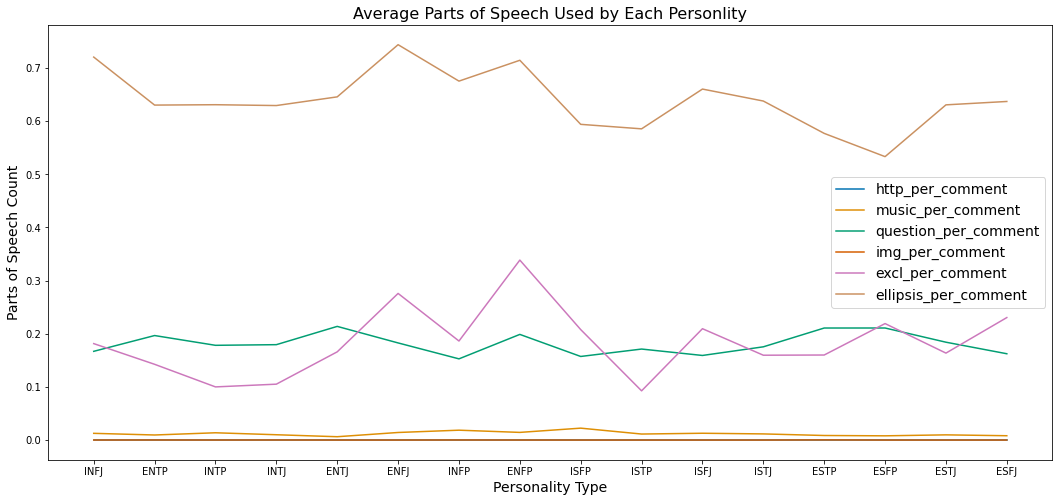

In [545]:
plt.figure(figsize=(18,8))
sns.lineplot(x='type', y='value', hue='variable', 
             data=pd.melt(df1, id_vars='type'),
             ci = None, 
             legend = 'full', palette = 'colorblind')

plt.legend(fontsize = 14)
plt.title('Average Parts of Speech Used by Each Personlity', fontsize=16)
plt.xlabel('Personality Type',fontsize=14)
plt.ylabel('Parts of Speech Count',fontsize=14)

In [546]:
x = df.drop(['type','posts','num_posts','I-E','N-S','T-F','J-P'], axis=1)
y = df['type'].values

<font color="violet">Splitting in to train and test set in [70:30] ratio

In [547]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.3,shuffle=True)

In [548]:
x

,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment
0,0.0,0.02,0.04,0.0,0.06,0.30
1,0.0,0.00,0.08,0.0,0.00,0.38
2,0.0,0.00,0.18,0.0,0.08,0.26
3,0.0,0.02,0.18,0.0,0.06,0.52
4,0.0,0.02,0.16,0.0,0.02,0.42
...,...,...,...,...,...,...
8670,0.0,0.00,0.10,0.0,0.12,0.14
8671,0.0,0.00,0.20,0.0,0.66,0.82
8672,0.0,0.00,0.14,0.0,0.02,0.38
8673,0.0,0.00,0.18,0.0,0.06,0.94


In [549]:
print(y.shape)
print(x.shape)

(8675,)
(8675, 6)


# <font color="orange">Machine Learning Model (Random Forest, LogisticRegression, K Neighbor)

<font color="Pink">Random Forest Classifier

In [550]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)

<font color="skyblue">Accuracy Score for of RFC Traing And testing data

In [551]:
random_forest.score(x_train, y_train)
acc_train_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Training Data Set",round(acc_train_random_forest,2,), "%")
acc_test_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
print("Testing Data Set", round(acc_test_random_forest,2,), "%")

Training Data Set 91.57 %
Testing Data Set 16.87 %


<font color="Pink">Logistic Regression

In [552]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Y_pred = logreg.predict(x_test)

<font color="skyblue">Accuracy Score of LR  for Traing And testing data

In [553]:
acc_train_log = round(logreg.score(x_train, y_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(logreg.score(x_test, y_test) * 100, 2)
print(round(acc_test_log,2,), "%")

23.63 %
24.16 %


<font color="pink">K Neighbor Classifier

In [554]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
Y_pred = knn.predict(x_test)

<font color="skyblue">Accuracy Score of KNN for Traing And testing data

In [555]:
acc_train_knn = round(knn.score(x_train, y_train) * 100, 2)
print(round(acc_train_knn,2,), "%")
acc_test_knn = round(knn.score(x_test, y_test) * 100, 2)
print(round(acc_test_knn,2,), "%")

47.53 %
14.02 %


In [556]:
Y_pred

array(['INFP', 'ENTP', 'INFJ', ..., 'INFJ', 'ENFP', 'ENFP'], dtype=object)

<font color="Violet">Classification report for testing data

In [557]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

        ENFJ       0.01      0.04      0.02        50
        ENFP       0.12      0.23      0.15       208
        ENTJ       0.03      0.09      0.05        66
        ENTP       0.08      0.14      0.11       213
        ESFJ       0.00      0.00      0.00        14
        ESFP       0.00      0.00      0.00        12
        ESTJ       0.00      0.00      0.00        14
        ESTP       0.00      0.00      0.00        28
        INFJ       0.19      0.24      0.21       435
        INFP       0.23      0.17      0.19       580
        INTJ       0.15      0.10      0.12       311
        INTP       0.21      0.11      0.14       400
        ISFJ       0.00      0.00      0.00        51
        ISFP       0.14      0.03      0.05        64
        ISTJ       0.00      0.00      0.00        62
        ISTP       0.00      0.00      0.00        95

    accuracy                           0.14      2603
   macro avg       0.07   

In [558]:
type(y_test), type(Y_pred)

(numpy.ndarray, numpy.ndarray)

In [559]:
predictions = pd.Series(Y_pred)

In [560]:
predictions = np.array(predictions)
label_test = np.array(y_test)

In [561]:
label_test[0], predictions[0]

('INFP', 'INFP')

<font color="skyblue">Graph plot for True and predicted Values

In [562]:
import plotly.express as px
import plotly.graph_objects as go

In [563]:
fig = px.violin(x=label_test, y=predictions, labels={'x': 'groundtruth','y': 'prediction'})
fig.add_shape(
              type='line', line=dict(dash='dash'),
            x0 = predictions.min(), y0 = predictions.min(),
            x1 = predictions.max(), y1 = predictions.max())
fig.show()

<font color="Pink"> ML model for I-E model comparison (RFC, LR, KNN)<font>


*   Introverts are energized by spending quiet time alone or with a small group. They tend to be more reserved and thoughtful.
*   Extroverts are energized by spending time with people and in busy, active surroundings. They tend to be more expressive and outspoken.



In [564]:
X1 = df.drop(['type','posts','num_posts','I-E'], axis=1)
y1 = df['I-E'].values

In [565]:
X1

,N-S,T-F,J-P,http_per_comment,music_per_comment,question_per_comment,img_per_comment,excl_per_comment,ellipsis_per_comment
0,0,1,0,0.0,0.02,0.04,0.0,0.06,0.30
1,0,0,1,0.0,0.00,0.08,0.0,0.00,0.38
2,0,0,1,0.0,0.00,0.18,0.0,0.08,0.26
3,0,0,0,0.0,0.02,0.18,0.0,0.06,0.52
4,0,0,0,0.0,0.02,0.16,0.0,0.02,0.42
...,...,...,...,...,...,...,...,...,...
8670,1,1,1,0.0,0.00,0.10,0.0,0.12,0.14
8671,0,1,1,0.0,0.00,0.20,0.0,0.66,0.82
8672,0,0,1,0.0,0.00,0.14,0.0,0.02,0.38
8673,0,1,1,0.0,0.00,0.18,0.0,0.06,0.94


In [566]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,y1,test_size = 0.1, random_state=5)

In [567]:
random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(x1_train, y1_train)
Y2_pred = random_forest1.predict(x1_test)

acc_train_random_forest = random_forest1.score(x1_train, y1_train)
print("Training Data Set",round(acc_train_random_forest*100,2,), "%")
acc_test_random_forest = random_forest1.score(x1_test, y1_test)
print("Testing Data Set", round(acc_test_random_forest*100,2,), "%")

Training Data Set 99.12 %
Testing Data Set 73.62 %


In [568]:
logreg1 = LogisticRegression()
logreg1.fit(x1_train, y1_train)
Y2_pred = logreg1.predict(x1_test)
acc_train_log = round(logreg1.score(x1_train, y1_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(logreg1.score(x1_test, y1_test) * 100, 2)
print(round(acc_test_log,2,), "%")

77.23 %
77.42 %


In [569]:
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(x1_train, y1_train)
Y2_pred = knn1.predict(x1_test)
acc_train_log = round(knn1.score(x1_train, y1_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(knn1.score(x1_test, y1_test) * 100, 2)
print(round(acc_test_log,2,), "%")

83.68 %
72.35 %


<font color="Pink"> ML model for N-S model comparison(RFC, LR, KNN)</font>
*   Sensors focus on their five senses and are interested in information they can directly see, hear, feel, and so on. They tend to be hands-on learners and are often described as "practical."
*  Intuitives focus on a more abstract level of thinking; they are more interested in theories, patterns, and explanations. They are often more concerned with the future than the present and are often described as "creative."

In [570]:
X2 = df.drop(['type','posts','num_posts','N-S'], axis=1)
y2 = df['N-S']

In [571]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size = 0.1, random_state=5)

In [572]:
random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(x2_train, y2_train)
Y3_pred = random_forest2.predict(x2_test)

acc_train_random_forest = random_forest2.score(x2_train, y2_train)
print("Training Data Set",round(acc_train_random_forest*100,2,), "%")
acc_test_random_forest = random_forest2.score(x2_test, y2_test)
print("Testing Data Set", round(acc_test_random_forest*100,2,), "%")

Training Data Set 99.33 %
Testing Data Set 85.6 %


In [573]:
logreg2 = LogisticRegression()
logreg2.fit(x2_train, y2_train)
Y2_pred = logreg2.predict(x2_test)
acc_train_log = round(logreg2.score(x2_train, y2_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(logreg2.score(x2_test, y2_test) * 100, 2)
print(round(acc_test_log,2,), "%")

86.03 %
87.79 %


In [574]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(x2_train, y2_train)
Y2_pred = knn2.predict(x2_test)
acc_train_log = round(knn2.score(x2_train, y2_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(knn2.score(x2_test, y2_test) * 100, 2)
print(round(acc_test_log,2,), "%")

88.61 %
85.37 %


<font color="Pink"> ML model for T-F model comparison(RFC, LR, KNN)</font>
*  Thinkers tend to make decisions with their heads; they are interested in finding the most logical, reasonable choice.
*  Feelers tend to make decisions with their hearts; they are interested in how a decision will affect people, and whether it fits in with their values

In [575]:
X3 = df.drop(['type','posts','T-F'], axis=1).values
y3 = df['T-F'].values

In [576]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X3,y3,test_size = 0.1, random_state=0)

In [577]:
random_forest3 = RandomForestClassifier(n_estimators=100)
random_forest3.fit(x3_train, y3_train)
Y3_pred = random_forest3.predict(x3_test)
acc_train_random_forest = random_forest3.score(x3_train, y3_train)
print("Training Data Set",round(acc_train_random_forest*100,2,), "%")
acc_test_random_forest = random_forest3.score(x3_test, y3_test)
print("Testing Data Set", round(acc_test_random_forest*100,2,), "%")

Training Data Set 98.73 %
Testing Data Set 60.48 %


In [578]:
# Logistic Regression
logreg3 = LogisticRegression()
logreg3.fit(x3_train, y3_train)
Y3_predd = logreg3.predict(x3_test)
acc_train_log = round(logreg3.score(x3_train, y3_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(logreg3.score(x3_test, y3_test) * 100, 2)
print(round(acc_test_log,2,), "%")

63.71 %
62.56 %


In [579]:
knn3 = KNeighborsClassifier(n_neighbors = 2)
knn3.fit(x3_train, y3_train)
Y3_pred = knn3.predict(x3_test)
acc_train_log = round(knn3.score(x3_train, y3_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(knn3.score(x3_test, y3_test) * 100, 2)
print(round(acc_test_log,2,), "%")

77.96 %
55.07 %


<font color="Pink"> ML model for J-P model comparison(RFC, LR, KNN)</font>
*  Judgers appreciate structure and order; they like things planned, and dislike last-minute changes.
*  Perceivers appreciate flexibility and spontaneity; they like to leave things open so they can change their minds.

In [580]:
X4 = df.drop(['type','posts','num_posts','J-P'], axis=1).values
y4 = df['J-P'].values

In [581]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X4,y4,test_size = 0.1, random_state=5)

In [582]:
random_forest4 = RandomForestClassifier(n_estimators=100)
random_forest4.fit(x4_train, y4_train)
Y4_pred = random_forest4.predict(x4_test)
acc_train_random_forest = random_forest4.score(x4_train, y4_train)
print("Training Data Set",round(acc_train_random_forest*100,2,), "%")
acc_test_random_forest = random_forest4.score(x4_test, y4_test)
print("Testing Data Set", round(acc_test_random_forest*100,2,), "%")

Training Data Set 98.27 %
Testing Data Set 57.26 %


In [583]:
# Logistic Regression
logreg4 = LogisticRegression()
logreg4.fit(x4_train, y4_train)
Y4_pred = logreg4.predict(x4_test)
acc_train_log = round(logreg4.score(x4_train, y4_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(logreg4.score(x4_test, y4_test) * 100, 2)
print(round(acc_test_log,2,), "%")

60.38 %
61.06 %


In [584]:
knn4 = KNeighborsClassifier(n_neighbors = 2)
knn4.fit(x4_train, y4_train)
Y4_pred = knn4.predict(x4_test)
acc_train_log = round(knn4.score(x4_train, y4_train) * 100, 2)
print(round(acc_train_log,2,), "%")
acc_test_log = round(knn4.score(x4_test, y4_test) * 100, 2)
print(round(acc_test_log,2,), "%")

76.92 %
51.15 %


<font color="Pink">Visulizing ML model for I-E, N-S, T-F, J-P model comparison

In [585]:
#INTJ Wordcloud
import cv2
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [586]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<font color="skyblue">Accuracy table of four major classes On RFC, LR, KNN model

In [587]:
temp = {'rf_train' : [99.12,86.03,63.71,60.38], 'rf_test' : [73.5,87.79,62.56,61.06],
        'lr_train':[77.23,86.03,98.74,98.28] ,'lr_test':[77.42,87.79,59.56,57.6],
        'knn_train' : [83.68,88.61,77.96,76.92], 'knn_test' :[72.35,85.37,55.07,51.15]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
rf_train,99.12,86.03,63.71,60.38
rf_test,73.50,87.79,62.56,61.06
lr_train,77.23,86.03,98.74,98.28
lr_test,77.42,87.79,59.56,57.60
knn_train,83.68,88.61,77.96,76.92
knn_test,72.35,85.37,55.07,51.15


<font color="Pink">Text Cleaning to remove stopwords

In [588]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def clean_text(words):
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [589]:
clean_text(all_posts['INTJ'].iloc[1])

{'Alpha': 1,
 'Dear': 1,
 'ENTJ': 1,
 'Long': 1,
 'Sincerely': 1,
 'see': 1,
 'sub': 1,
 'time': 1}

<font color="skyblue">Accuracy Plot for four major Classes(I-E, N-S, T-F, J-P)

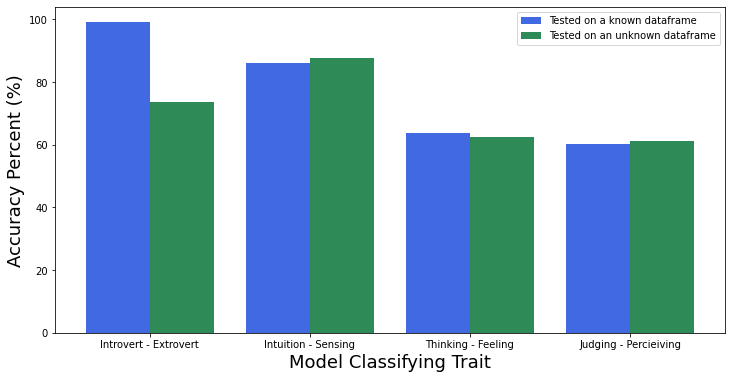

In [590]:
labels = np.array(results.columns)

training = results.loc['rf_train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['rf_test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Model Classifying Trait', size = 18)
ax.set_ylabel('Accuracy Percent (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Tested on a known dataframe', 'Tested on an unknown dataframe'))
plt.show()

# <font color="orange">Word Cloud & Most Used Words

Here we had finded 10 most time appered words(Common word) for each class from cleaned text 

In [591]:
df['wordslist'] = df['posts'].map(lambda x: clean_text(x))

In [592]:
df.loc[8612:8612][['type','wordslist']]

,type,wordslist
8612,ENTJ,"{'tell': 1, 'christ': 1, 'wan': 1, 'na': 1, 't..."


In [593]:
df['cleaned_str'] = df['wordslist'].str.join(" ")

In [594]:
print(df.loc[8612:8612]['cleaned_str'])
print(len(df.loc[8612:8612]['cleaned_str'].values[0]))

8612    tell christ wan na thank everyone input far um...
Name: cleaned_str, dtype: object
1008


In [595]:
df.loc[8612:8612]['cleaned_str'].values[0]

"tell christ wan na thank everyone input far um 're lesbians ... quit canvassing job 'm proud standing 's definitely gifted writer poet sure incorporate showed posts think going look libraries avid reader ideas case n't work thanks glad could make someone laugh yes bet ass swear sober fyi ca talk pretty much lonely nights sexual 8. girlfriend loves infps adorable know 'd without mine oh wait masturbating lot leaving house recreationally less tootsiebear267 comes naturally xd would like read hello yeah entj posting thread serious type rather upset lately choices high school want minions mini-mes sorry disappoint p guys fascinating yuugi 8w7 sx/sp/so enjoy long romantic walks bar hopefully returning infp arms hobbies include world domination panic whenever lose something imperfect dammit welcome new well mentioned anime ones sent samsung-sgh-i337 using tapatalk go teaching keep realistic depends n literal things black-and-white thinker nonverbal learning disorder impairs ability process 

In [596]:
df.drop(columns='wordslist', inplace=True)

<font color="pink">Function to count the top number of wrords and display in a graph
Takes in arguements:</font>
*     data - list or string to count words
*     isstr - if True, data parsed in is a string, and needs to perform split into list 
*     num_words - count of the most common words
*     plot - if a graph is required to be plotted. 
*     color - defining the color. None for default
*     ax - the axes to be plot on
    
    Returns Dataframe of the common words and their count

In [597]:
from collections import Counter
def findcommonwords(data, isstr=True, num_words=20, plot=True, color=None, ax=None):
    if isstr:
        #splitting into individual words
        indiv_words = data.strip().split(" ")
        #print (indiv_words)
    else:
        indiv_words = data   
    common = pd.DataFrame(Counter(indiv_words).most_common(num_words), columns=('words', 'count')).sort_values(by='count', ascending=False)
    
    if plot:    
        sns.barplot(x='count', y='words', data=common, color=color, ax=ax)
        ax.set_yticklabels(common['words'])   
    return common

In [598]:
df2 = df.loc[8610:8615][['cleaned_str']]
df2

,cleaned_str
8610,'luftkopf think isfps keep soft spot outliers ...
8611,'the thing comes mind infj going care characte...
8612,tell christ wan na thank everyone input far um...
8613,'logged account year gone wonder long would ta...
8614,'i really n't care birthday holidays general w...
8615,'woah holy crap ever glad know someone else wr...


0    'luftkopf
1        think
2        isfps
3         keep
4         soft
5         spot
6     outliers
7       people
8    periphery
9      society
Name: words, dtype: object

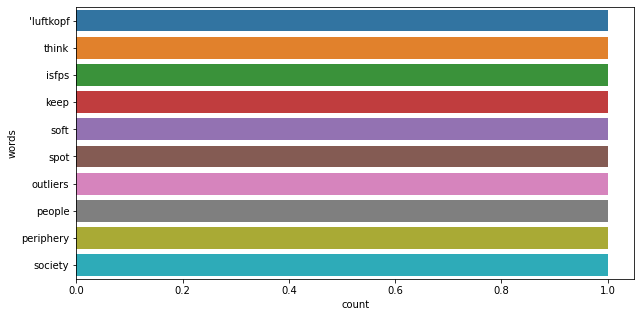

In [599]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
df_common = findcommonwords(df2['cleaned_str'].values[0], isstr=True, num_words=10, plot=True, ax=ax)['words']
df_common

**<font color="skyblue"> Plot for Wordcloud (common-word) for each 16 Classes** 

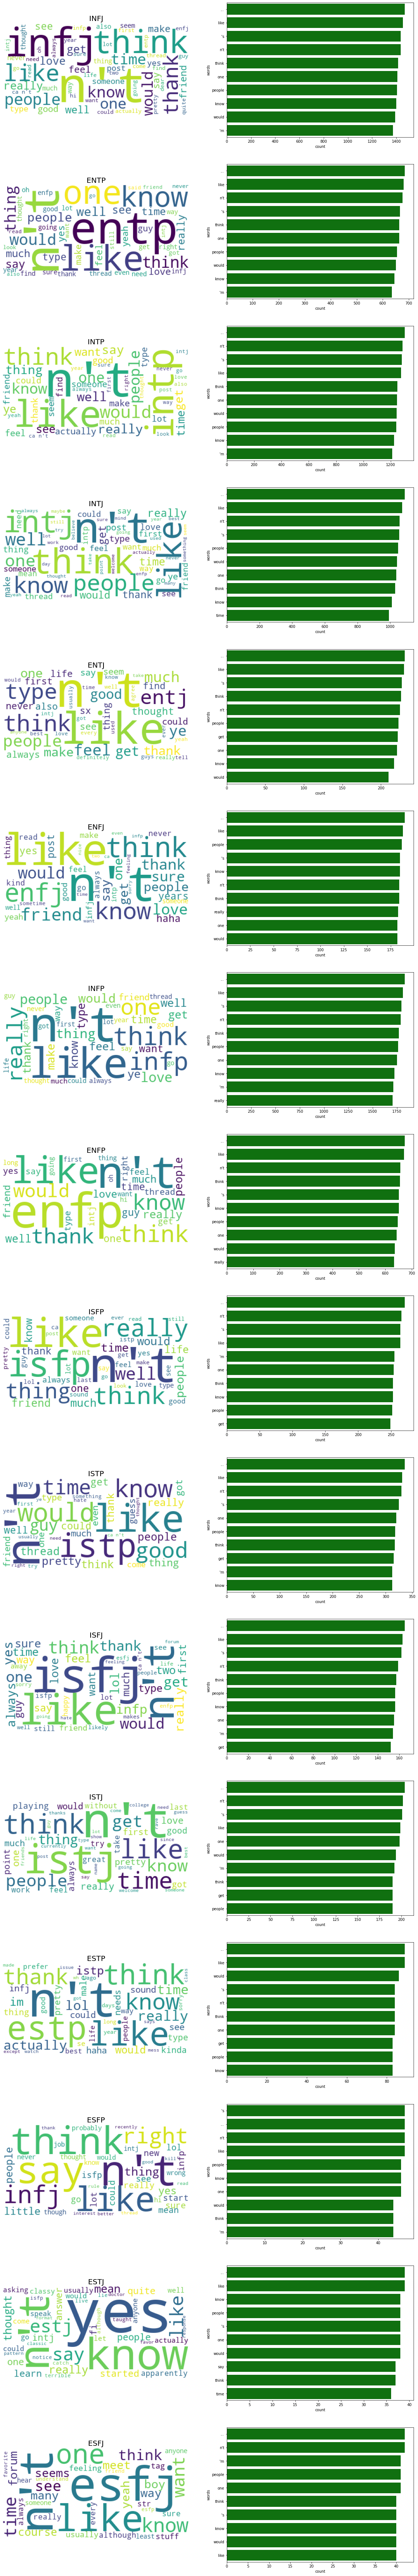

In [600]:
from nltk.corpus import stopwords
fig, ax = plt.subplots(nrows=len(df['type'].unique()), ncols=2, figsize=(20,8*len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(min_font_size=10, 
                          background_color ='white',
                          normalize_plurals=True,
                          stopwords=stopwords.words("english"),
                         repeat=False).generate(df_4['cleaned_str'].to_string())
    ax[k][0].imshow(wordcloud) #, interpolation='bilinear'
    ax[k][0].set_title(i, fontsize = 20)
    ax[k][0].axis("off")
    
    type_str = " ".join(r for r in df_4['cleaned_str'])
    #plotting the top 10 words for each type
    findcommonwords(type_str, isstr=True, num_words=10, plot=True, color='green', ax=ax[k][1])
    
    k += 1

# <font color="orange">Deep Neural Network

In [601]:
df["cleaned_str"].values[0]

"enfp intj moments sportscenter top ten plays pranks life-changing experience life repeat today may perc immerse last thing infj friend posted facebook committing suicide next day rest peace~ hello enfj7 sorry hear distress 's natural relationship perfection time every moment existence try figure hard times growth ... 84389 84390 welcome stuff game set match prozac wellbrutin least thirty minutes moving legs n't mean sitting desk chair weed moderation maybe edibles healthier alternative basically come three items 've determined type whichever types want would likely use given cognitive functions whatnot left things sims indeed video good one note somewhat subjective completely promoting death sim dear favorite games growing current cool appears late sad someone everyone wait thought confidence cherish solitude b/c revel within inner world whereas 'd workin enjoy worry people always around yo entp ladies 're complimentary personality well hey main social outlet xbox live conversations e

In [602]:
df_dnn =pd.DataFrame()

In [603]:
df_dnn["type"] = df["type"]
#df_dnn["posts"] = df["posts"]

In [604]:
def get_type_index(string):
    return list(types).index(string)
df_dnn['type_index'] = df['type'].apply(get_type_index)
df_dnn["cleaned_str"] = df["cleaned_str"]

In [605]:
df_dnn

,type,type_index,cleaned_str
0,INFJ,8,enfp intj moments sportscenter top ten plays p...
1,ENTP,3,'i 'm finding lack posts alarming sex boring '...
2,INTP,11,'good one _____ course say know 's blessing cu...
3,INTJ,10,'dear intp enjoyed conversation day esoteric g...
4,ENTJ,2,'you 're fired 's another silly misconception ...
...,...,...,...
8670,ISFP,13,ixfp always think cats fi doms reason especial...
8671,ENFP,1,'so ... thread already exists someplace else h...
8672,INTP,11,'so many questions things would take purple pi...
8673,INFP,9,'i conflicted right comes wanting children hon...


In [606]:
print(df["cleaned_str"].shape, df["type"].shape)

(8675,) (8675,)


<font color="pink">splitting into train and text dataset

In [607]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_dnn)
train, val = train_test_split(train)

In [608]:
print(train.shape, val.shape, test.shape)

(4879, 3) (1627, 3) (2169, 3)


In [609]:
train

,type,type_index,cleaned_str
8014,ENTP,3,'i love show chris lilley genius first thing j...
8536,ENFP,1,'as psych student going uni end road beginning...
5014,INTJ,10,'i always hear people saying 'm cute ... even ...
7902,ESTP,7,haha think im estp se ti fe ni told member fam...
5694,ENFJ,0,'sorry put quite frankly bullshit 's victim bl...
...,...,...,...
1665,INTJ,10,'that reasonable understand 's good explanatio...
2025,INFP,9,'einstein alpha nt way likely lii-ne subtype s...
3769,INTP,11,'do money someone else taught piano tender age...
1637,INFJ,8,'well thanks responses thought replied posts c...


# <font color="orange">Deep Neural Network Model(CNN)

In [610]:
df_dnn2 = pd.DataFrame()

In [611]:
df_dnn2["type"] = df["type"]
df_dnn2["cleaned_str"] = df["cleaned_str"]

In [612]:
df_dnn2

,type,cleaned_str
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,'i 'm finding lack posts alarming sex boring '...
2,INTP,'good one _____ course say know 's blessing cu...
3,INTJ,'dear intp enjoyed conversation day esoteric g...
4,ENTJ,'you 're fired 's another silly misconception ...
...,...,...
8670,ISFP,ixfp always think cats fi doms reason especial...
8671,ENFP,'so ... thread already exists someplace else h...
8672,INTP,'so many questions things would take purple pi...
8673,INFP,'i conflicted right comes wanting children hon...


In [613]:
#Suffling the data and splitting the data into train and test sets (90:10)
import random
df4= df_dnn2.values
df4=list(df4)
suffled_set=random.sample(df4,len(df4))
train_len=int(len(suffled_set)*0.9)
train=suffled_set[:train_len]
test=suffled_set[train_len:]

In [614]:
#Data Summary
print('Length of the Data: ',len(df_dnn2))
print('No. of Training Examples: ',len(train))
print('No. of Test Examples: ',len(test))
print('No. of Classes: ',df['type'].nunique())

Length of the Data:  8675
No. of Training Examples:  7807
No. of Test Examples:  868
No. of Classes:  16


In [615]:

train_sentences=[]
test_sentences=[]
train_labels=[]
test_labels=[]
labels=[]
sentences=[]

for i in range(len(train)):
  train_labels.append(train[i][0])
  train_sentences.append(train[i][1])

for i in range(len(test)):
  test_labels.append(test[i][0])
  test_sentences.append(test[i][1])

for i in range(len(suffled_set)):
  labels.append(suffled_set[i][0])
  sentences.append(suffled_set[i][1])

<font color="skyblue">Tokenization and Padding

In [616]:

import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

embedding_dim = 300
max_length = 900
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len=19999


tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)
print('Original Size of Vocabulary: ',vocab_size)

word_index = {e:i for e,i in word_index.items() if i <= vocab_len+1} #Reducing the Size of Vocabulary
print('New Size of Vocabulary: ',len(word_index))

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Label Encoding the labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels=le.transform(train_labels) 
le.fit(test_labels)
test_labels=le.transform(test_labels) 
le.fit(labels)
labels=le.transform(labels) 

train_labels=np.expand_dims(train_labels, axis=1)
test_labels=np.expand_dims(test_labels, axis=1)
labels=np.expand_dims(labels, axis=1)


Original Size of Vocabulary:  113356
New Size of Vocabulary:  20000


In [617]:
#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Test Data: ',test_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Test Labels: ',test_labels.shape)
print('Dimension of Data: ',padded.shape)
print('Dimension of Labels: ',labels.shape)

Dimension of Training Data:  (7807, 900)
Dimension of Test Data:  (868, 900)
Dimension of Training Labels:  (7807, 1)
Dimension of Test Labels:  (868, 1)
Dimension of Data:  (8675, 900)
Dimension of Labels:  (8675, 1)


<font color="orange">Sequential model for Convolutional Neural Network(CNN classifier)

A 10 hidden layers Neural Network was trained. Summary of model is plotted below. Batch normalization applies a transformation
that maintains the mean output close to 0 and the output standard deviation close to 1.

In [618]:
#from keras.regularizers import l2
#Building the CNN Model
model_conv = tf.keras.Sequential([
    #tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix], trainable = False),
    tf.keras.layers.Embedding(vocab_len+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(128,3,activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='softmax')
])

In [619]:
model_conv.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 900, 300)          6000000   
                                                                 
 conv1d_4 (Conv1D)           (None, 898, 64)           57664     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 449, 64)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 447, 128)          24704     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 223, 128)         0         
 1D)                                                             
                                                                 
 dropout_28 (Dropout)        (None, 223, 128)        

<font color="skyblue">training the Convolutional Neural Network with 10 epochs

In [620]:
model_conv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history=model_conv.fit(train_padded, train_labels, epochs=num_epochs, validation_split=0.2)

Epoch 1/10
196/196 [==============================] - 117s 593ms/step - loss: 2.3048 - accuracy: 0.2027 - val_loss: 2.1916 - val_accuracy: 0.2093
Epoch 2/10
196/196 [==============================] - 108s 550ms/step - loss: 2.0178 - accuracy: 0.3047 - val_loss: 2.0090 - val_accuracy: 0.3342
Epoch 3/10
196/196 [==============================] - 113s 575ms/step - loss: 1.4250 - accuracy: 0.5259 - val_loss: 2.2444 - val_accuracy: 0.3502
Epoch 4/10
196/196 [==============================] - 121s 617ms/step - loss: 0.8143 - accuracy: 0.7401 - val_loss: 3.0882 - val_accuracy: 0.3611
Epoch 5/10
196/196 [==============================] - 109s 554ms/step - loss: 0.4630 - accuracy: 0.8477 - val_loss: 3.8647 - val_accuracy: 0.3489
Epoch 6/10
196/196 [==============================] - 111s 565ms/step - loss: 0.2914 - accuracy: 0.9047 - val_loss: 4.1369 - val_accuracy: 0.3278
Epoch 7/10
196/196 [==============================] - 109s 557ms/step - loss: 0.1862 - accuracy: 0.9404 - val_loss: 5.2661 -

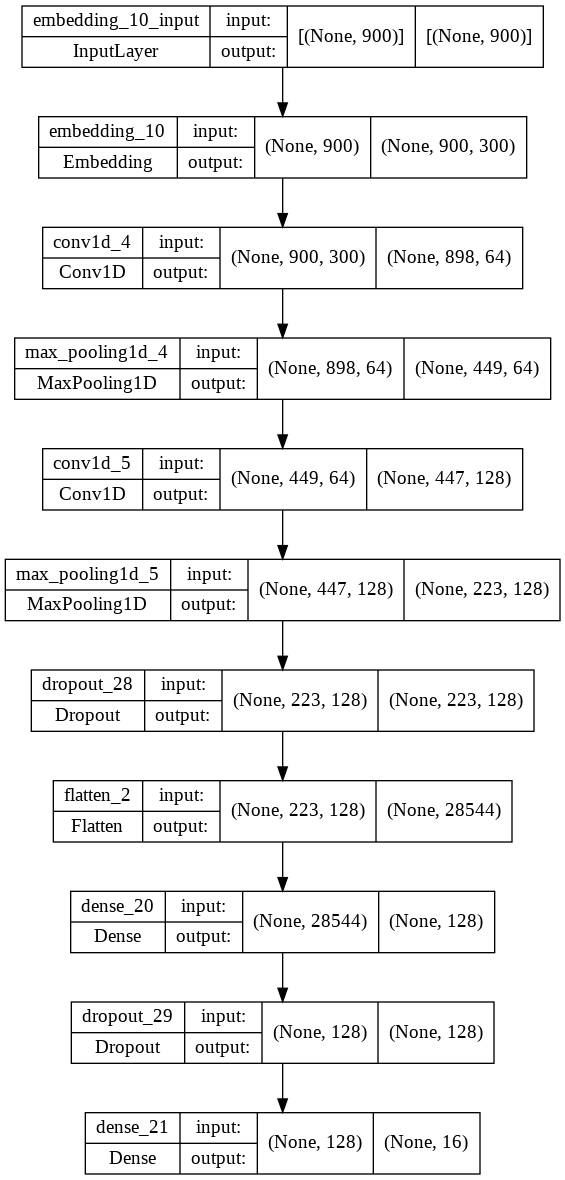

In [622]:
tf.keras.utils.plot_model(model_conv, to_file='model.png', show_shapes=True, show_layer_names=True)

<font color="skyblue">training and validation loss plot and accuracy plot for CNN

<Figure size 432x288 with 0 Axes>

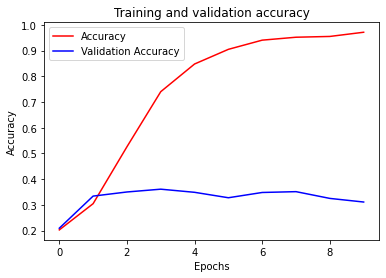

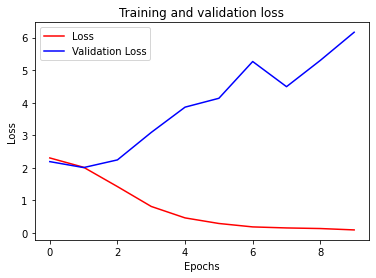

<Figure size 432x288 with 0 Axes>

In [623]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [624]:
score, acc = model_conv.evaluate(test_padded, test_labels, verbose=2)
print('Test accuracy:', acc)

28/28 - 3s - loss: 5.9730 - accuracy: 0.3168 - 3s/epoch - 113ms/step
Test accuracy: 0.31682026386260986


In [625]:
pred_prob_test_labels=model_conv.predict(test_padded)
pred_test_labels=[]
for i in range(len(pred_prob_test_labels)):
  pred_test_labels.append(np.argmax(pred_prob_test_labels[i]))  

In [626]:
pred_test_labels=np.array(pred_test_labels)
true_test_labels=np.squeeze(test_labels, axis=1)

In [627]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(true_test_labels, pred_test_labels)
print('Cohen Score: ',cohen_score)

Cohen Score:  0.199284414230823


<font color="pink">Confusion Matrix for CNN model-</font>
*   This function will prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.



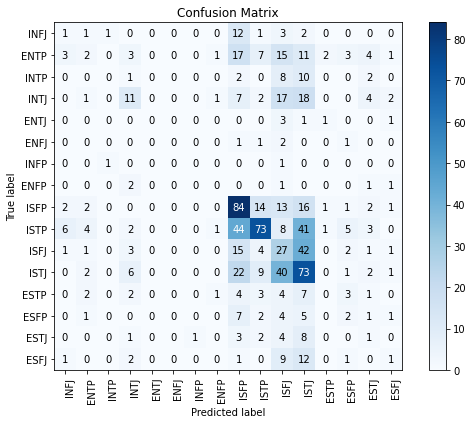

In [628]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plot_confusion_matrix(true_test_labels, pred_test_labels, classes=df['type'].unique(),
                      title='Confusion Matrix')
